In [1]:
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
col_names = ["px1","px2","px3","px4","px5","px6","px7","px8","px9","px10","px11","px12","px13","px14","px15",
             "py1","py2","py3","py4","py5","py6","py7","py8","py9","py10","py11","py12","py13","py14","py15",
             "vx1","vx2","vx3","vx4","vx5","vx6","vx7","vx8","vx9","vx10","vx11","vx12","vx13","vx14","vx15",
             "vy1","vy2","vy3","vy4","vy5","vy6","vy7","vy8","vy9","vy10","vy11","vy12","vy13","vy14","vy15",
             "ax1","ax2","ax3","ax4","ax5","ax6","ax7","ax8","ax9","ax10","ax11","ax12","ax13","ax14","ax15",
             "ay1","ay2","ay3","ay4","ay5","ay6","ay7","ay8","ay9","ay10","ay11","ay12","ay13","ay14","ay15"]

df = pd.read_csv("/Users/root1/Desktop/FOSSACS/training_phase/traj_bf.csv", names = col_names)
df.head()

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,ay6,ay7,ay8,ay9,ay10,ay11,ay12,ay13,ay14,ay15
0,8.6894,11.689,14.694,-8.9584,-5.7454,14.573,5.8246,-8.5673,10.773,-0.309440,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.0000
1,8.6874,11.722,14.770,-8.9290,-5.6985,14.620,5.8585,-8.5062,10.804,-0.254690,...,-0.86220,0.58134,0.17702,0.58222,0.49631,-1.4023,1.2982,-1.3233,0.59990,1.2362
2,8.6812,11.742,14.836,-8.8896,-5.6376,14.655,5.8822,-8.4303,10.822,-0.188930,...,-0.86220,0.58134,0.17702,0.58222,0.49631,-1.4023,1.2982,-1.3233,0.59990,1.2362
3,8.6670,11.751,14.893,-8.8391,-5.5627,14.678,5.8970,-8.3401,10.826,-0.113730,...,-0.86220,0.58134,0.17702,0.58222,0.49631,-1.4023,1.2982,-1.3233,0.59990,1.2362
4,8.6449,11.747,14.941,-8.7774,-5.4739,14.690,5.9029,-8.2357,10.817,-0.029084,...,-0.87972,0.51444,0.41474,0.57864,0.47942,-1.4056,1.2164,-1.3606,0.59327,1.2235


In [5]:
# number of agents
k = 15

# relative position
i = k
while i>0:
    df['px' '%d' %(i)] = df['px' '%d' %(i)] - df['px1']
    df['py' '%d' %(i)] = df['py' '%d' %(i)] - df['py1']
    i = i - 1

# verifying data
df.head()

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,ay6,ay7,ay8,ay9,ay10,ay11,ay12,ay13,ay14,ay15
0,0.0,2.9996,6.0046,-17.6478,-14.4348,5.8836,-2.8648,-17.2567,2.0836,-8.998840,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.0000
1,0.0,3.0346,6.0826,-17.6164,-14.3859,5.9326,-2.8289,-17.1936,2.1166,-8.942090,...,-0.86220,0.58134,0.17702,0.58222,0.49631,-1.4023,1.2982,-1.3233,0.59990,1.2362
2,0.0,3.0608,6.1548,-17.5708,-14.3188,5.9738,-2.7990,-17.1115,2.1408,-8.870130,...,-0.86220,0.58134,0.17702,0.58222,0.49631,-1.4023,1.2982,-1.3233,0.59990,1.2362
3,0.0,3.0840,6.2260,-17.5061,-14.2297,6.0110,-2.7700,-17.0071,2.1590,-8.780730,...,-0.86220,0.58134,0.17702,0.58222,0.49631,-1.4023,1.2982,-1.3233,0.59990,1.2362
4,0.0,3.1021,6.2961,-17.4223,-14.1188,6.0451,-2.7420,-16.8806,2.1721,-8.673984,...,-0.87972,0.51444,0.41474,0.57864,0.47942,-1.4056,1.2164,-1.3606,0.59327,1.2235


In [4]:
# positions and velocities of all the agents
inputs = ["px1","px2","px3","px4","px5","px6","px7","px8","px9","px10","px11","px12","px13","px14","px15",
          "py1","py2","py3","py4","py5","py6","py7","py8","py9","py10","py11","py12","py13","py14","py15",
          "vx1","vx2","vx3","vx4","vx5","vx6","vx7","vx8","vx9","vx10","vx11","vx12","vx13","vx14","vx15",
          "vy1","vy2","vy3","vy4","vy5","vy6","vy7","vy8","vy9","vy10","vy11","vy12","vy13","vy14","vy15",]

# acceleration of an agent
outputs = ["ax1","ay1"]

# convert into dataframes
x = df[inputs]
y = df[outputs]

# adjust for NN usage
X = x.values
Y = y.values

# fit data for training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
X_train

array([[-1.7074e+00, -7.3522e+00, -4.0826e+00, ...,  4.5084e-01,
         2.3426e-01,  4.3630e-01],
       [-1.1531e+01, -8.8894e+00, -1.4622e+01, ..., -3.9435e-01,
        -1.5218e-01, -3.5384e-01],
       [ 8.7432e+00,  1.2739e+01,  1.4768e+00, ...,  1.3093e-01,
         1.1819e-01,  8.8431e-02],
       ...,
       [-2.1398e+01, -1.6851e+01, -2.3850e+01, ...,  1.1648e-02,
        -1.9946e-01, -1.7931e-01],
       [-9.8247e+00, -1.4020e+01, -9.8282e+00, ..., -5.0212e-01,
        -6.7741e-01, -4.6986e-01],
       [-7.3967e+00, -1.2978e+01, -6.0743e+00, ...,  7.1068e-03,
         6.8079e-02, -8.8839e-02]])

In [6]:
# DNN training
model = Sequential()

# gives the number of input features
n_cols = X.shape[1]

# hidden layers
model.add(Dense(84, activation='relu', input_shape=(n_cols,)))
model.add(Dense(84, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(84, activation='relu'))

# output layer
model.add(Dense(2))

# optimization
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001, amsgrad=False)
model.compile(optimizer='adam', loss='mean_squared_error', metrics =['accuracy'])
model.summary()

start = time.perf_counter()

# training
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=5000 , epochs=1000, verbose = 1)

end = time.perf_counter()

# output training time
print(end-start)

# save the NN model
#model.save("nerual_controller.h5")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 84)                5124      
_________________________________________________________________
dense_23 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_24 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_25 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_26 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 170       
Total params: 33,854
Trainable params: 33,854
Non-trainable params: 0
__________________________________________________

KeyboardInterrupt: 

In [47]:
model.save("nerual_controller.h5")

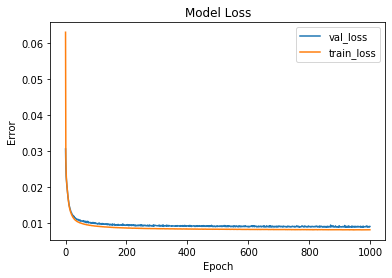

In [48]:
# training error visualization
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['val_loss','train_loss'])
# plt.savefig('error_plot.png')

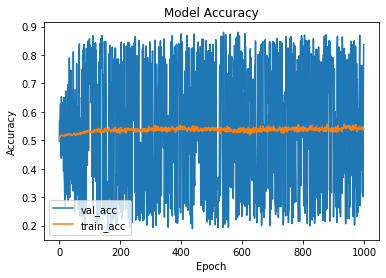

In [49]:
# training accuracy visualization
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_acc','train_acc'])

In [16]:
# testing

k = 15
model = load_model('nerual_controller.h5')

for t in range(1):
    
    # final dataframe for storing output
    finaldf = pd.DataFrame(columns=col_names)

    # Generating init configs for testing
    init_px = np.random.uniform(-15,15,k)
    init_py = np.random.uniform(-15,15,k)
    init_vx = np.random.uniform(0,1,k)
    init_vy = np.random.uniform(0,1,k)
    init_ax = np.random.uniform(0,0,k)
    init_ay = np.random.uniform(0,0,k)

    args = (init_px , init_py , init_vx , init_vy, init_ax, init_ay)
    test_input = np.concatenate(args)

    test_df = pd.DataFrame(test_input.reshape(-1, len(test_input)),columns=col_names)

    # repeat for number of time steps for the neural controller
    steps = 1
    while steps < 1000:
        test = test_df[inputs]
        X_test = test.values
        
        # generate accelerations
        y_pred = model.predict(X_test)
        #print(y_pred)

        # storing the controller generated accelearations for all agents
        for i in range(0, k):
            test_df['ax' '%d' % (i + 1)] = y_pred[0, 0]
            test_df['ay' '%d' % (i + 1)] = y_pred[0, 1]

        # generating positions and velocities for all agents for next time step using motion dynamics
        for j in range(1, k+1):
            test_df['vx' '%d' % (j)] = test_df['vx' '%d' % (j)] + 0.1*test_df['ax' '%d' % (j)]
            test_df['vy' '%d' % (j)] = test_df['vy' '%d' % (j)] + 0.1*test_df['ay' '%d' % (j)]
            test_df['px' '%d' % (j)] = test_df['px' '%d' % (j)] + 0.1*test_df['vx' '%d' % (j)]
            test_df['py' '%d' % (j)] = test_df['py' '%d' % (j)] + 0.1*test_df['vy' '%d' % (j)]

        # stores the final dataframe outputting the results
        finaldf.loc[test_df.index[0] + steps] = test_df.iloc[0]
        steps = steps + 1

        # keeping track of progress
        print(steps)

    #output results to a csv file
    finaldf.to_csv('/Users/root1/Desktop/FOSSACS/finaldf_'+'%d' %t+'.csv', index=False, header=False) 


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27